In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm


In [2]:
data=pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\data analytics\capstone projects ML\Walmart\drive-download-20230709T122717Z-001-2\Walmart ML project_VamsipriyaBayya\Trailrun\Walmart DataSet.csv')

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#change the datatype of date
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
#change the index as Date
data.index=data['Date']

In [8]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667


In [9]:
data=data.drop(['Date'],axis=1) #drop the Date column

In [10]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


In [11]:
data=data.sort_index()

In [12]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765
2010-02-05,37,536006.73,0,45.97,2.572,209.852966,8.554
2010-02-05,17,789036.02,0,23.11,2.666,126.442065,6.548
2010-02-05,30,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...
2012-10-26,25,688940.94,0,56.69,3.882,216.151590,7.293
2012-10-26,5,319550.77,0,71.70,3.506,224.037814,5.422
2012-10-26,40,921264.52,0,49.65,3.917,138.728161,4.145


In [13]:
data1=pd.DataFrame(data[['Store','Weekly_Sales']]) #create a new dataframe data1 so that original dataset is preserved

In [14]:
data1


,Store,Weekly_Sales
Date,,
2010-02-05,1,1643690.90
2010-02-05,10,2193048.75
2010-02-05,37,536006.73
2010-02-05,17,789036.02
2010-02-05,30,465108.52
...,...,...
2012-10-26,25,688940.94
2012-10-26,5,319550.77
2012-10-26,40,921264.52


<AxesSubplot:xlabel='Date'>

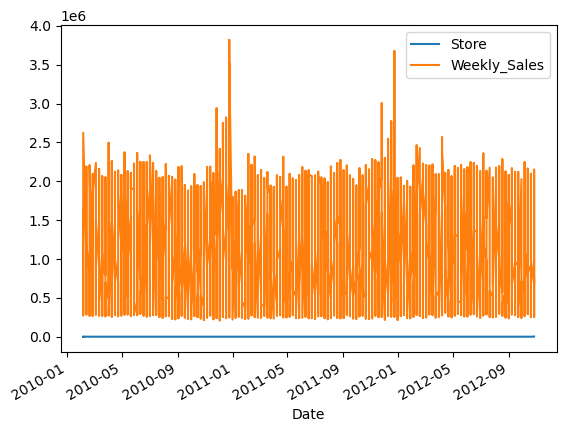

In [15]:
data1.plot() #overall data line graph to see the trend and seasonality

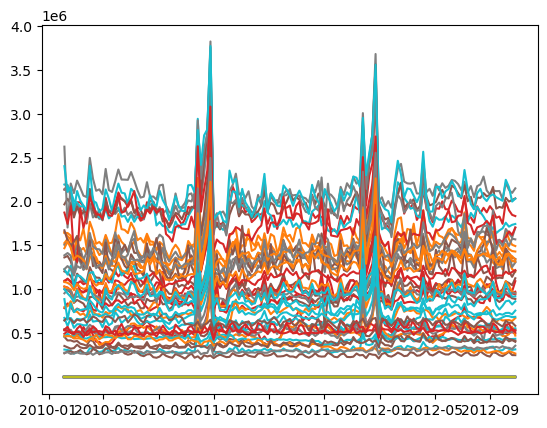

In [16]:
for i in range(1,46):
    plt.plot(data1[data1['Store']==i])

In [17]:
#from above plot of all the 45 stores together we see some trend in the data but lets dive deeper.

In [18]:
# find the top 5 best performing stores 

total_sales_storewise=data1.groupby('Store')['Weekly_Sales'].sum()
best_Store=total_sales_storewise.sort_values(ascending=False)
best_Store.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [19]:
best_three_store_list=best_Store.index.tolist()[:3] #creating  a list of top 3 best performing stores index for analysis

In [20]:
best_three_store_list

[20, 4, 14]

In [21]:
# find the top 5 performing stores 

total_sales_storewise=data1.groupby('Store')['Weekly_Sales'].sum()
worst_Store=total_sales_storewise.sort_values(ascending=True)
worst_Store.head()

Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
Name: Weekly_Sales, dtype: float64

In [22]:
worst_three_store_list=worst_Store.index.tolist()[:3] #top 3 worst performing stores for further analysis
worst_three_store_list

[33, 44, 5]

In [23]:
# combining both best 3 and worst 3 stores in one list for further time series analysis
best_worst_store_list=best_three_store_list+worst_three_store_list
best_worst_store_list

[20, 4, 14, 33, 44, 5]

In [24]:
# creating a loop on the best and worst stores and perform the stationarity test using Dickey Fuller test
#and then seperating stationary stores and non stationary stores in separate list to perform futher anlaysis 
## if the p-value is less then 0.05 we can reject the null hypothesis:Data is non stationary
#and accept the alternate hypothesis:Data is stationary
stationary_data_stores=[]
nonstationary_data_stores=[]
for store_number in best_worst_store_list:
    from statsmodels.tsa.stattools import adfuller
    result=adfuller(data1[data1['Store']==store_number]['Weekly_Sales'])
    pvalue=result[1]
    pvalue
    if pvalue < 0.05:
        print(f'store {store_number}  pvalue : {pvalue} so data is stationary')
        stationary_data_stores.append(store_number)
    else:
        print(f'store {store_number} pvalue: {pvalue} so data is non-stationary') 
        nonstationary_data_stores.append(store_number)

store 20  pvalue : 3.4912952838128635e-06 so data is stationary
store 4  pvalue : 0.04779866223669852 so data is stationary
store 14 pvalue: 0.06786986708375088 so data is non-stationary
store 33  pvalue : 0.0008379552269735585 so data is stationary
store 44 pvalue: 0.75916186357073 so data is non-stationary
store 5  pvalue : 0.00042517056141923467 so data is stationary


### Inference:

Here we can see the store 20,4,33  and 5 have stationary data and store 14 amd 44 are non-stationary.

    

In [25]:
# created 2 seperate lists of stationary data and non-stationary data
print(stationary_data_stores)
print(nonstationary_data_stores)

[20, 4, 33, 5]
[14, 44]


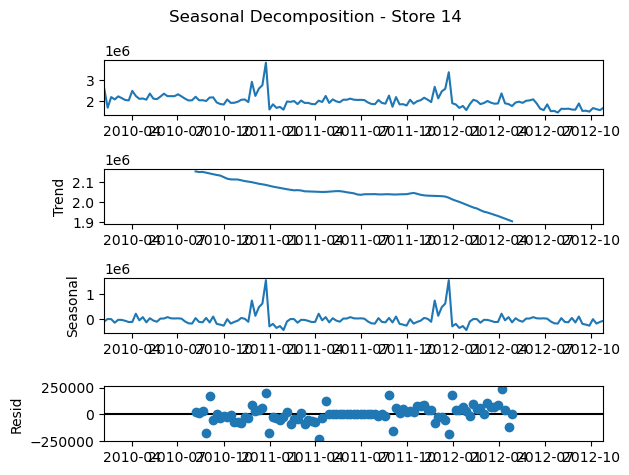

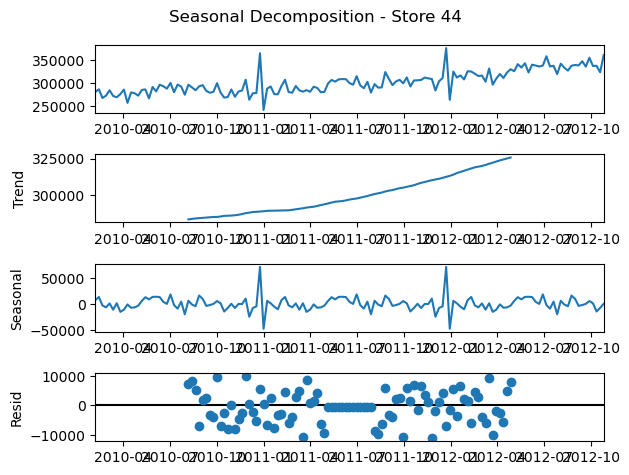

In [26]:
 # Iterate through each Non Stationary dsts store and perform seasonal decomposition #final 17/10
for store_number in nonstationary_data_stores:
    # Create a DataFrame for the specific store
    store_data = data1[data1['Store'] == store_number][['Weekly_Sales']]
    
    # Sort the DataFrame by index
    store_data = store_data.sort_index()
    
    # Perform seasonal decomposition
    decompose = seasonal_decompose(store_data.dropna())
    
    # Plot the decomposition
    decompose.plot()
    plt.suptitle(f'Seasonal Decomposition - Store {store_number}')
    plt.tight_layout()
    plt.show()

In Store 14 we can see there is downward trend and we can notice that there is seasonality in the data.
Where as in Store 44 we can see there is upward trend and there is seasonality.There are outliers in the data.

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

If the weekly sales show a seasonal trend,it means that there is a regular and predictable pattern of sales throughout the year. 
This pattern can be caused by a variety of factors, including:
        
Weather: Sales of certain products may be higher during certain times of the year due to weather conditions.
    
Holidays: Sales of certain products may be higher during certain holidays. 
    
Cultural events: Sales of certain products may be higher during certain cultural events. 
    
Consumer behavior: Consumers may have different spending habits at different times of the year.

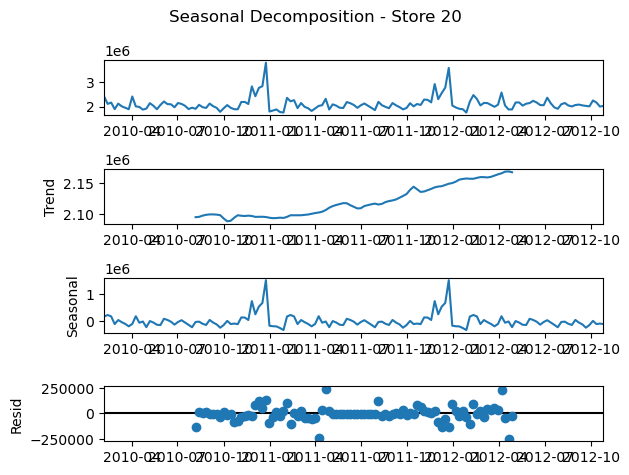

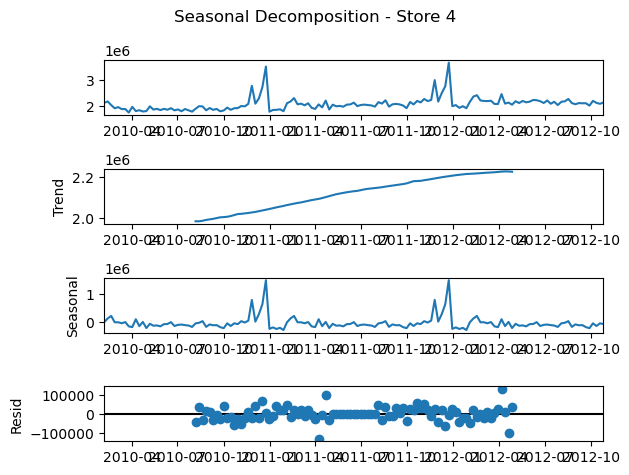

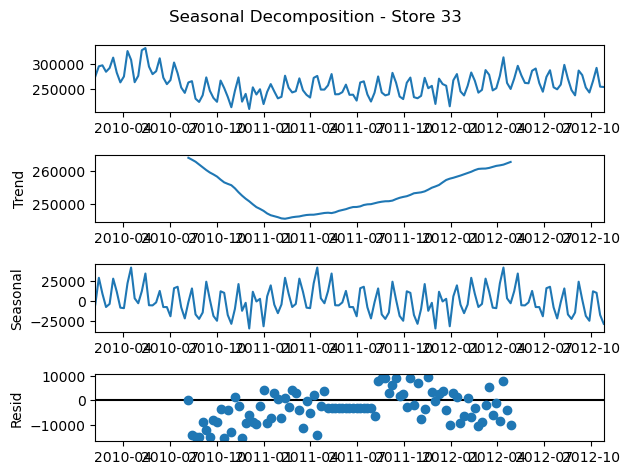

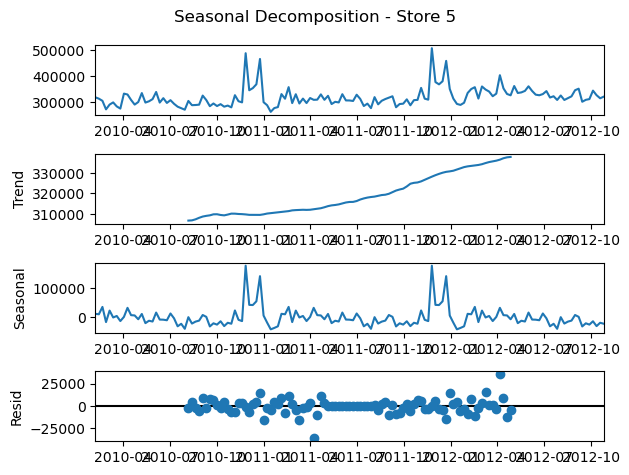

In [27]:
# Iterate through each store and perform seasonal decomposition #final 17/10
for store_number in stationary_data_stores:
    # Create a DataFrame for the specific store
    store_data = data1[data1['Store'] == store_number][['Weekly_Sales']]
    
    # Sort the DataFrame by index
    store_data = store_data.sort_index()
    
    # Perform seasonal decomposition
    decompose = seasonal_decompose(store_data.dropna())
    
    # Plot the decomposition
    decompose.plot()
    plt.suptitle(f'Seasonal Decomposition - Store {store_number}')
    plt.tight_layout()
    plt.show()

### inference:

The seasonal component of the decomposition plot shows the repeating pattern of variation in the data over time.
Here in the above plots for stores 20,4.33 and 5 we can see a strong seasonality.

The trend component of the decomposition plot shows the overall direction of the data over time.
Here in store 20,4 and 5 the trend component is positive, that means the data is trending upwards.But in case of store 33
there is a downward trend first and then slowly we see a upward trend.

The residual component of the decomposition plot shows the variation in the data that cannot be explained 
by the seasonal and trend components.Here in store 33 residual component is large, that means there may be outliers in the store 33 data.


## Convert the Nonstationary data stores Stationary and then build the model 

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


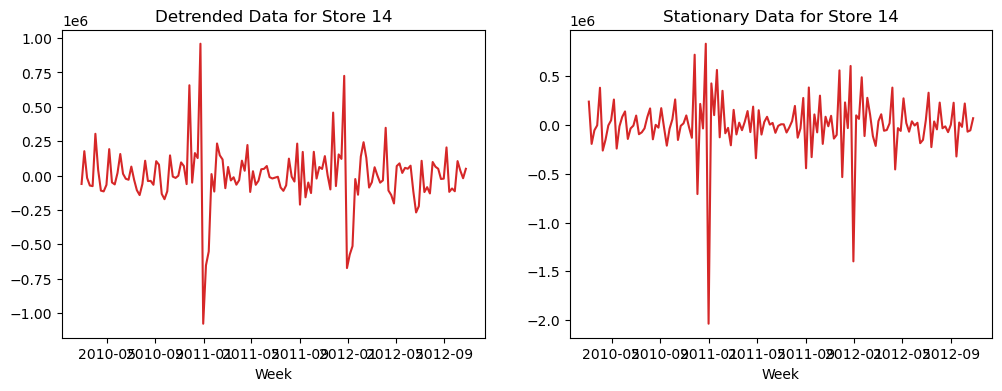

<Figure size 1200x600 with 0 Axes>

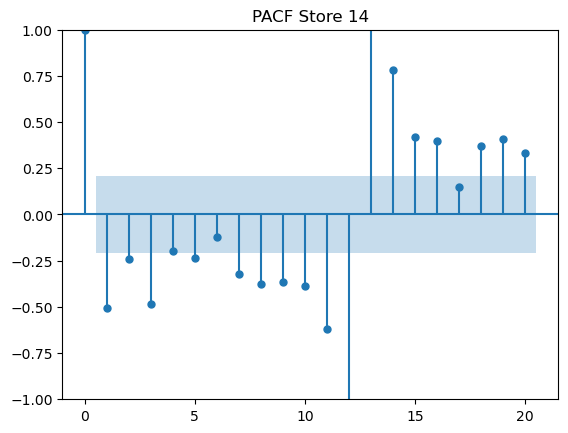

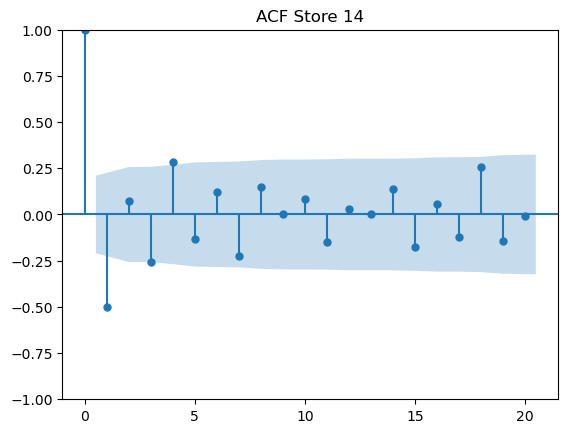

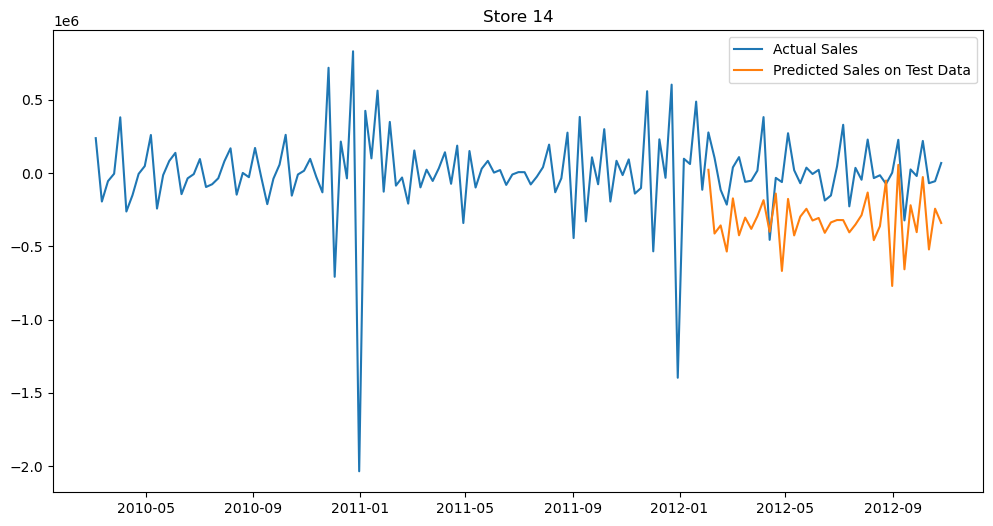

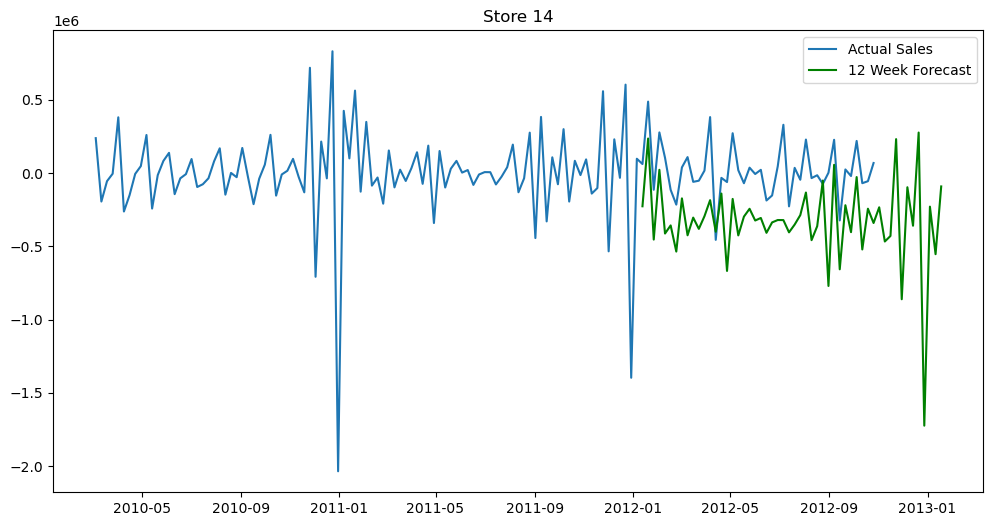

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


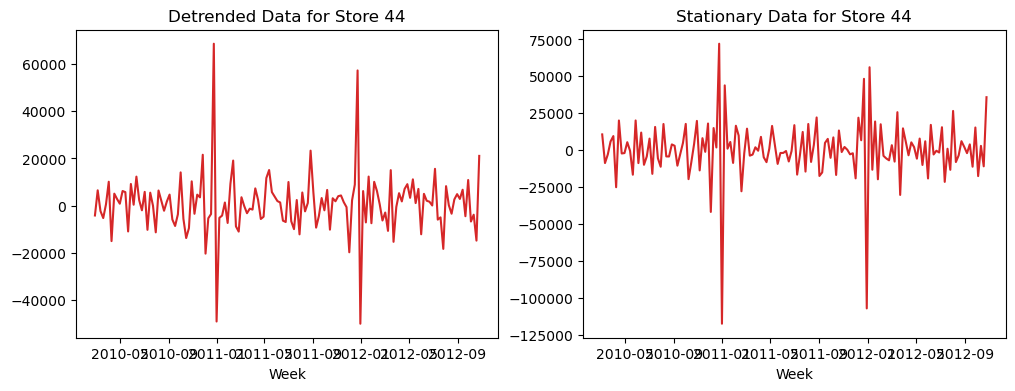

<Figure size 1200x600 with 0 Axes>

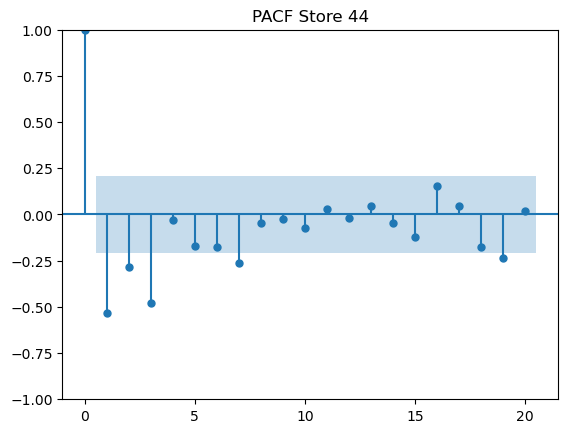

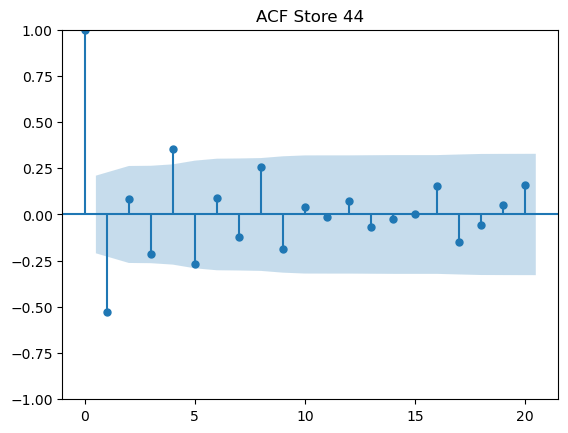

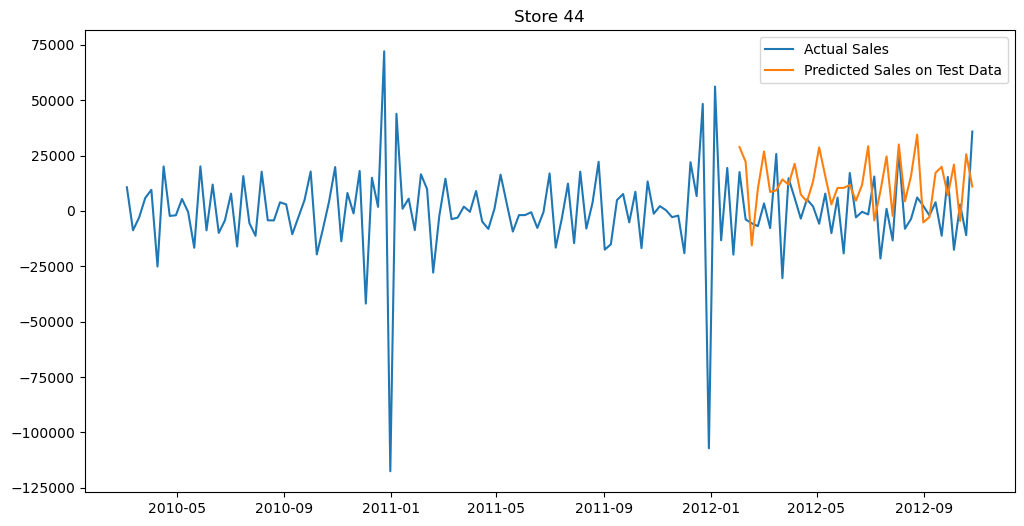

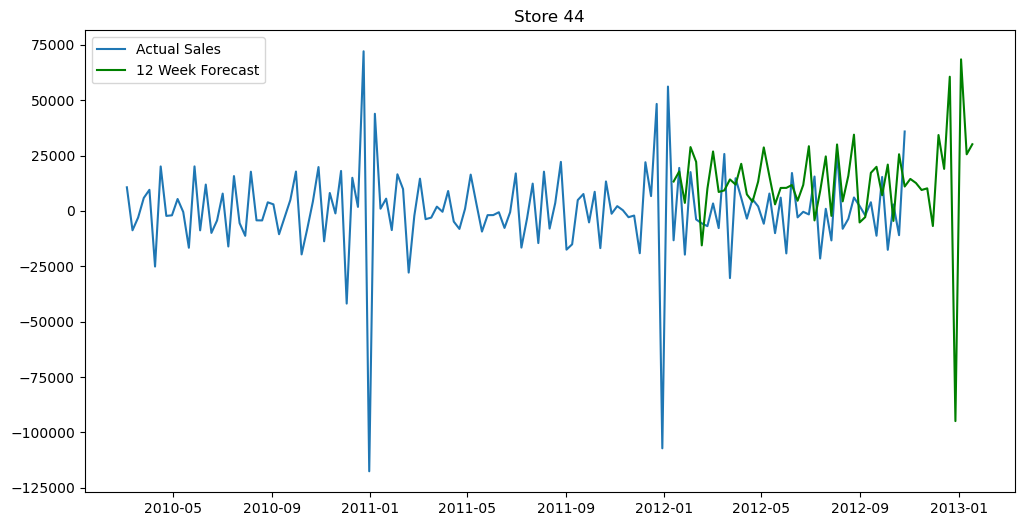

In [38]:
# removing trend
for store_number in nonstationary_data_stores:
    # Create a DataFrame for the specific store
    store_data = data1[data1['Store'] == store_number][['Weekly_Sales']]
    
    # Sort the DataFrame by index
    store_data = store_data.sort_index()
    rolling_mean=store_data.rolling(window=4).mean()
    rolling_mean_detrended=store_data-rolling_mean
    rolling_mean_detrended=rolling_mean_detrended.dropna()
# seasonal differencing
    rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()
    rolling_mean_detrended_diff.isna().sum()
    rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()
    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the detrended data
    axes[0].plot(rolling_mean_detrended, color='tab:red', label='Detrended Data')
    axes[0].set_title(f'Detrended Data for Store {store_number}')

    # Plot the stationary data
    axes[1].plot(rolling_mean_detrended_diff, color='tab:red', label='Stationary Data')
    axes[1].set_title(f'Stationary Data for Store {store_number}')

    # Label the x-axes
    axes[0].set_xlabel('Week')
    axes[1].set_xlabel('Week')
    # Create lag features
    rolling_mean_detrended_diff['lag1'] = rolling_mean_detrended_diff['Weekly_Sales'].diff()
    rolling_mean_detrended_diff['lag52'] =rolling_mean_detrended_diff['Weekly_Sales'].diff(52)
   
    # Plot PACF and ACF for 'lag52'
    plt.figure(figsize=(12, 6))
#     ax = plt.subplot(121)
    plot_pacf(rolling_mean_detrended_diff['lag52'].dropna(), lags=20,title=f'PACF Store {store_number}')#ax=ax)
#     ax = plt.subplot(122)
    plot_acf(rolling_mean_detrended_diff['lag52'].dropna(), lags=20,title=f'ACF Store {store_number}')#ax=ax)
    # Splitting the data into train and test
    trainstore=rolling_mean_detrended_diff[:round(len(store_data)*.7)]
    teststore=rolling_mean_detrended_diff[round(len(store_data)*.7):]
    from pmdarima import auto_arima

    trainstore_data=pd.DataFrame(trainstore['Weekly_Sales'])
    teststore_data=pd.DataFrame(teststore['Weekly_Sales'])


   
    # Find p (lag for PACF)
    p = 0
    pacf_values = sm.tsa.pacf(rolling_mean_detrended_diff['lag52'].dropna(), nlags=20)
    for pacf_value in pacf_values:
        if abs(pacf_value) >= 0.05:
            break
        p += 1

    # Find q (lag for ACF)
    q = 0
    acf_values = sm.tsa.acf(rolling_mean_detrended_diff['lag52'].dropna(), nlags=20)
    for acf_value in acf_values:
        if abs(acf_value) >= 0.05:
            break
        q += 1

    # Fit SARIMA model
    model = SARIMAX(rolling_mean_detrended_diff['Weekly_Sales'][:round(len(rolling_mean_detrended_diff) * 0.7)], order=(p, 1, q), seasonal_order=(p, 1, q, 52))
    model_fit = model.fit(disp=False)
    pred=model_fit.predict(start=len(trainstore_data),end=len(trainstore_data)+len(teststore_data)-1,dynamic=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_mean_detrended_diff['Weekly_Sales'], label='Actual Sales')
    plt.plot(pred, label='Predicted Sales on Test Data')
    plt.title(f'Store {store_number}')
    plt.legend()
    plt.show()

     

    # Plot actual sales and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_mean_detrended_diff['Weekly_Sales'], label='Actual Sales')
    plt.plot(forecast, label='12 Week Forecast',color='green')
    plt.title(f'Store {store_number}')
    plt.legend()
    plt.show()

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


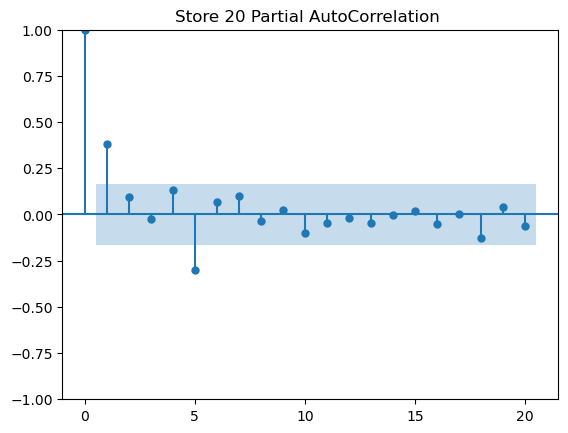

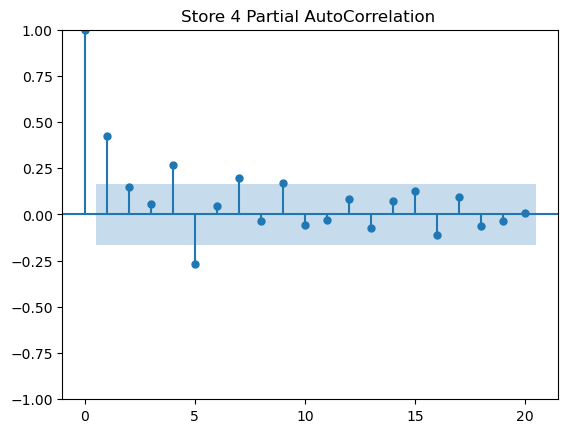

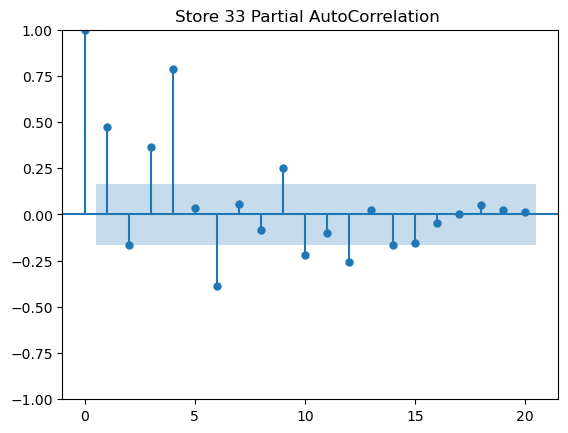

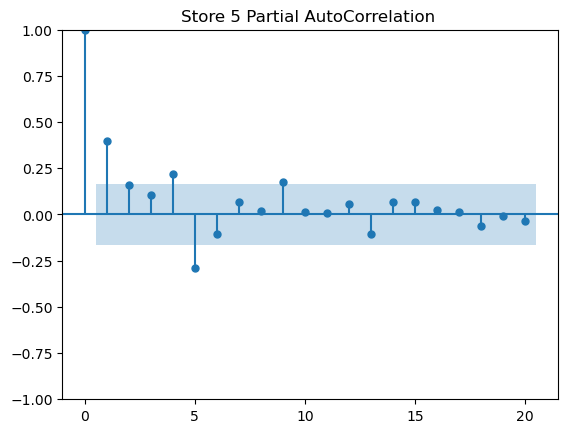

In [28]:
## Since the data is seasonal, Sarimax seems the more appropriate choice
# finding p,q and d values using acf and pacf plots
# plotting pacf for finding the value of p
# Seasonal data often has long-range autocorrelations.taking lags=20 to capture that.
for store_number in stationary_data_stores:
    store_data=data1[data1['Store']==store_number]
#The PACF is plotted at lags 20 because it is generally considered to be sufficient to capture
# the most important lags in a time series model.
    plot_pacf(store_data['Weekly_Sales'],lags=20,title=f'Store {store_number} Partial AutoCorrelation ')

    

creating the two new columns in the store1 dataframe: lag1 and lag52.

The lag1 column contains the first order difference of the Weekly_Sales column, which is the change in weekly sales from one week to the next.

The lag52 column contains the 52nd order difference of the Weekly_Sales column, which is the change in weekly sales from 52 weeks ago.

the first order difference removes the trend from the time series, but it does not completely remove the seasonality.

The 52nd order difference completely removes the seasonality from the time series.

In [ ]:
#lets make the non Stationary store 14 and Store 44 Stationary by removing the trend and seasonality


C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

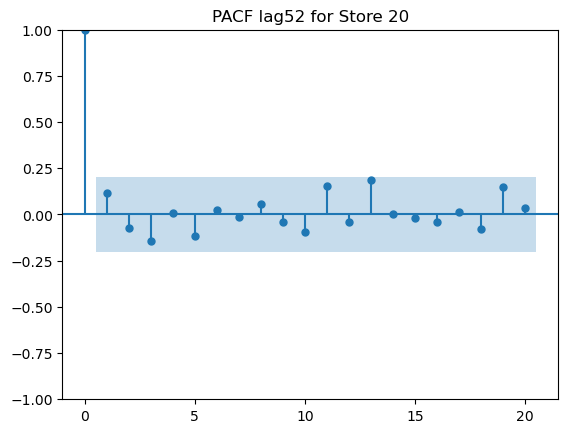

<Figure size 1200x600 with 0 Axes>

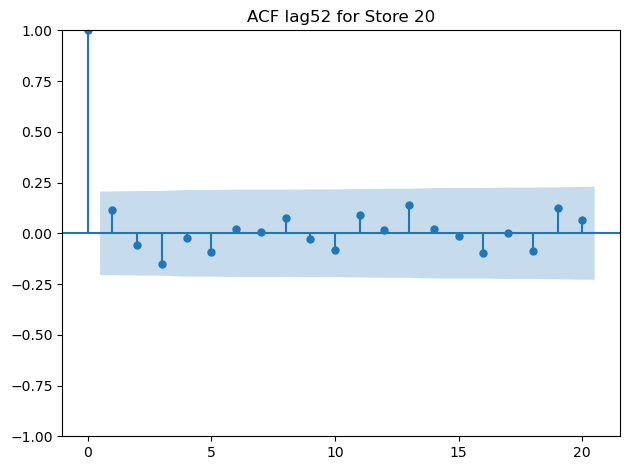

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

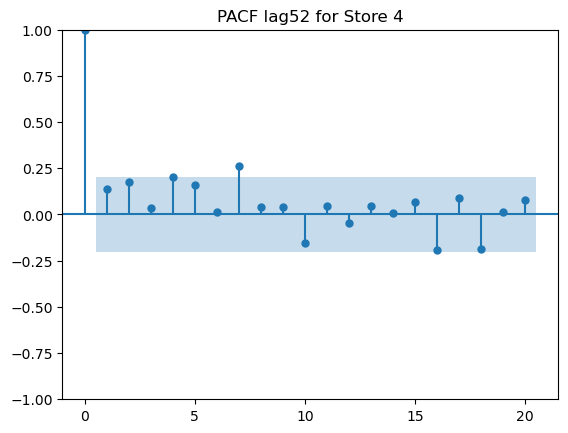

<Figure size 1200x600 with 0 Axes>

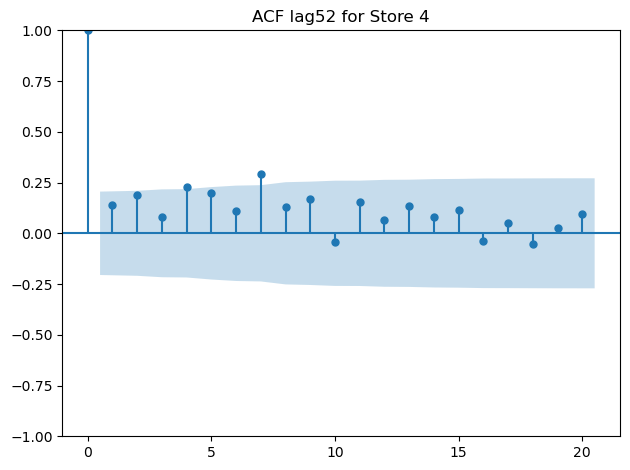

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

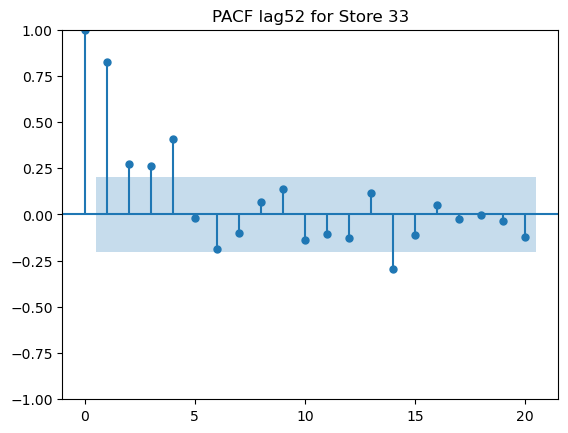

<Figure size 1200x600 with 0 Axes>

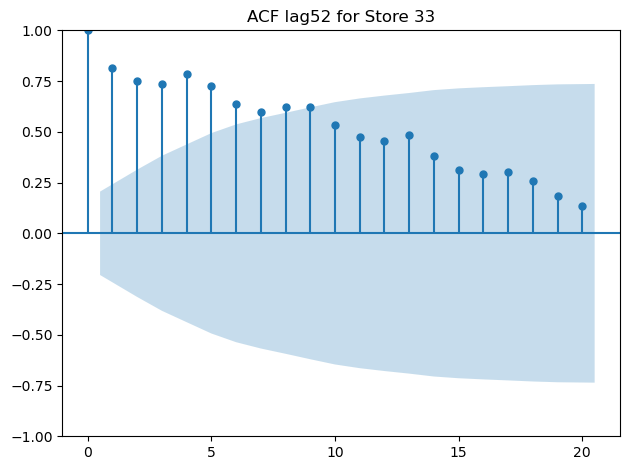

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

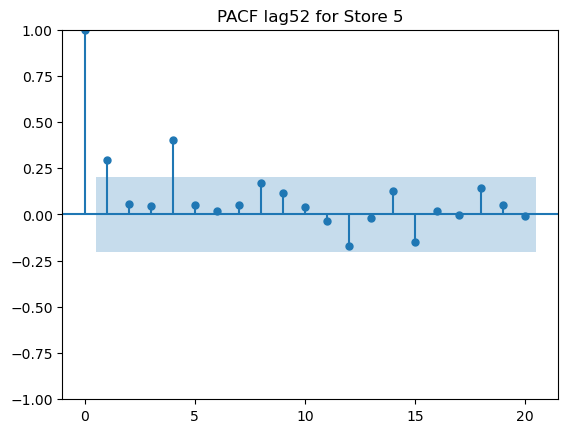

<Figure size 1200x600 with 0 Axes>

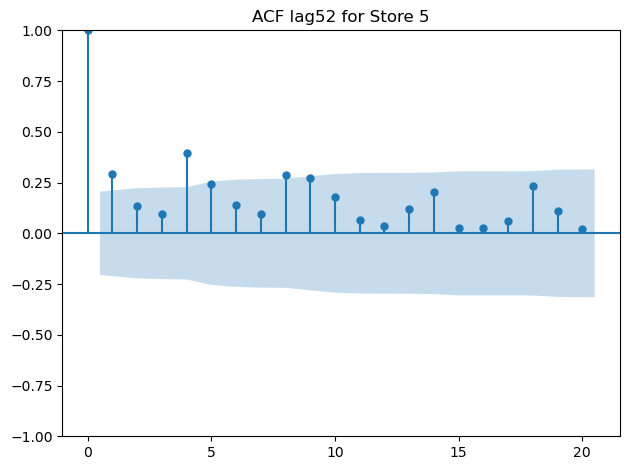

In [29]:
# Create a list to store DataFrames for each store
store_data_list = []
# Create lists to store p and q values for all stores
pacf_p_values = []
acf_q_values = []
# Loop through and analyze each store
for store_number in stationary_data_stores:
    # Create a DataFrame for the specific store
    store_data = pd.DataFrame(data1[data1['Store'] == store_number]['Weekly_Sales']).copy()
    store_data=store_data.sort_index()
    # Create lag features
    store_data['lag1'] = store_data['Weekly_Sales'].diff()
    store_data['lag52'] = store_data['Weekly_Sales'].diff(52)
    # Set the index of store_data to match data1
#     store_data.set_index('Date', inplace=True)
    # Remove null values
    store_data.dropna(subset=['lag1', 'lag52'], inplace=True)

    # Plot PACF and ACF for 'lag52'
    plt.figure(figsize=(12, 6))
    pacf_values=plot_pacf(store_data['lag52'], lags=20,title=f'PACF lag52 for Store {store_number}')
    
    plt.figure(figsize=(12, 6))
    acf_values=plot_acf(store_data['lag52'], lags=20,title=f'ACF lag52 for Store {store_number}')
    
    plt.tight_layout()
    plt.show()
     # Append p and q values to the lists
    pacf_p_values.append(pacf_values)
    acf_q_values.append(acf_values)
    
    # Append the store-specific data to the list
#     store_data_list.append(store_data)

   # Combine all store-specific DataFrames into a single DataFrame
#     store_data = pd.concat(store_data_list, ignore_index=True)



## model building for Sationary data Stores

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

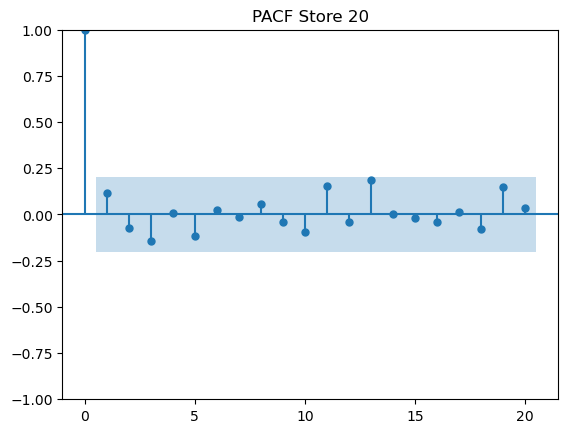

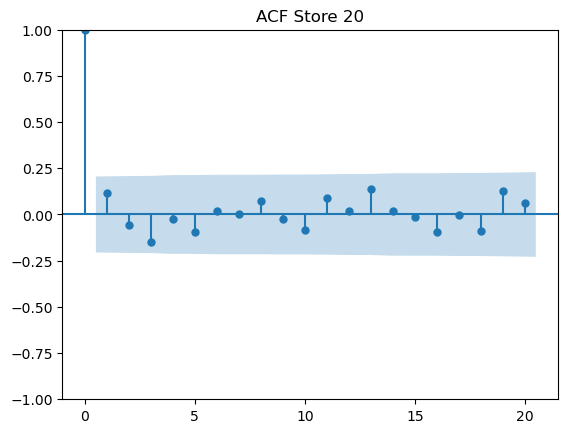

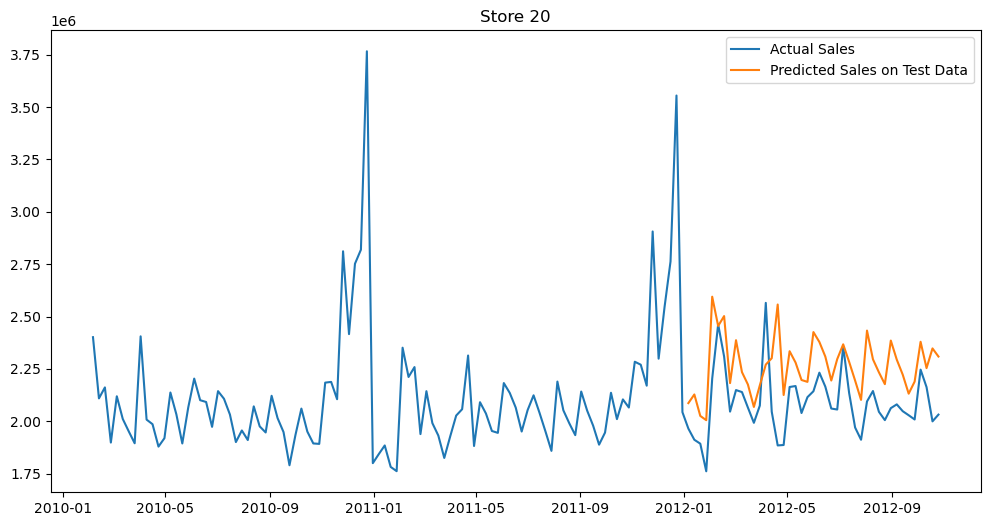

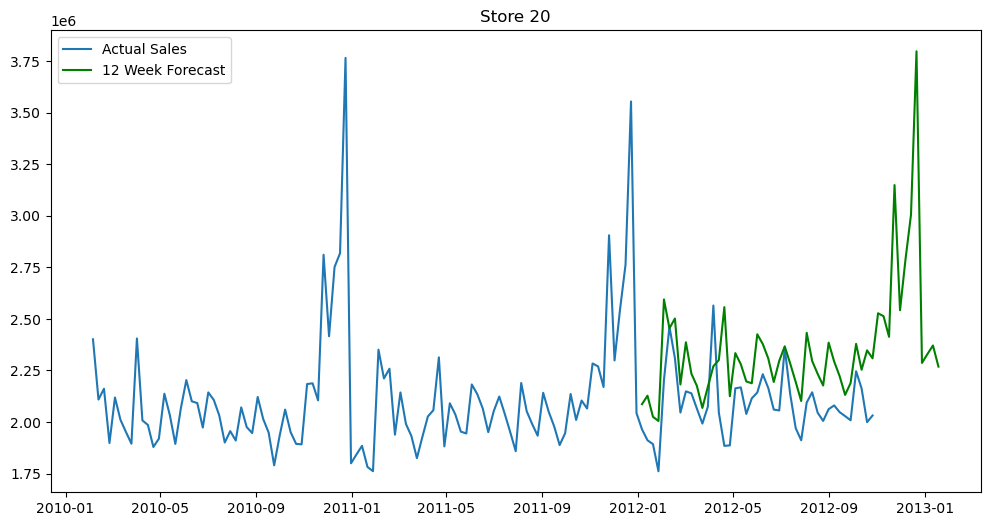

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

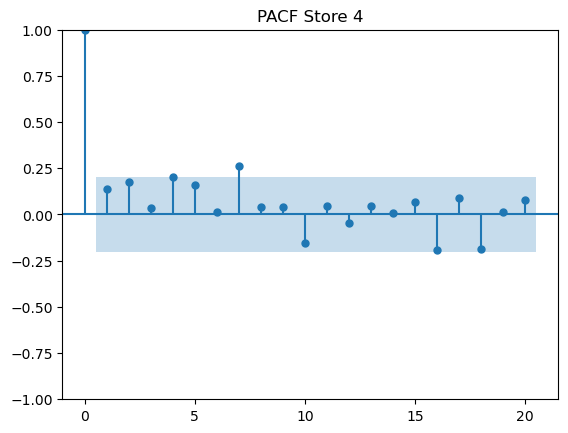

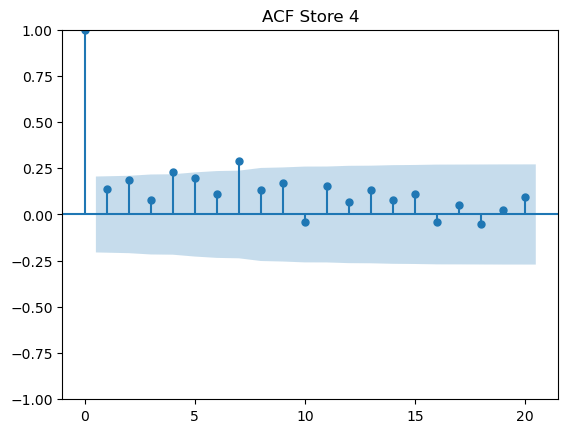

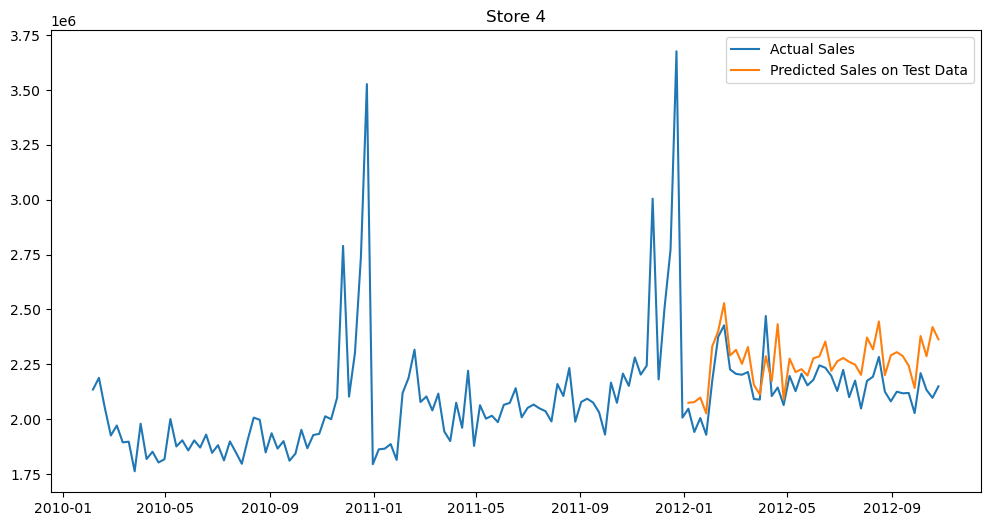

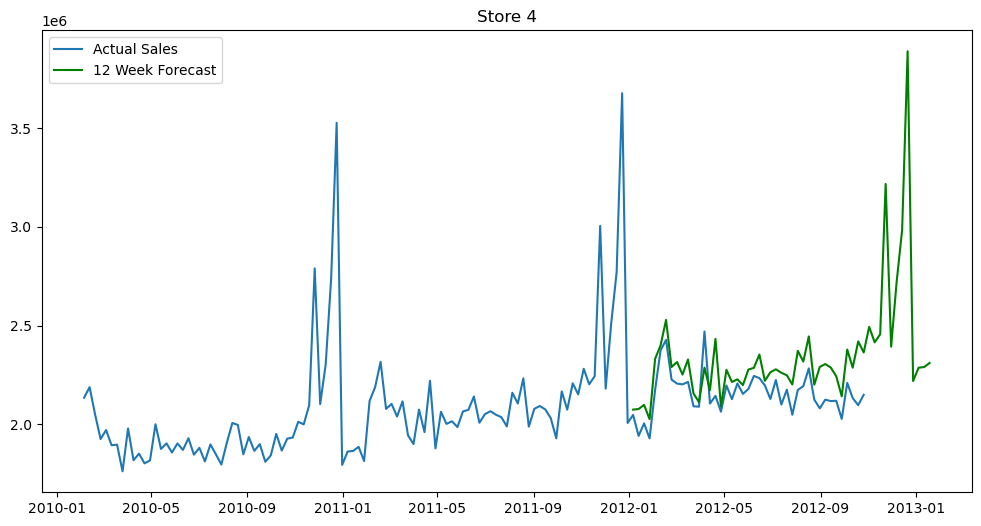

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

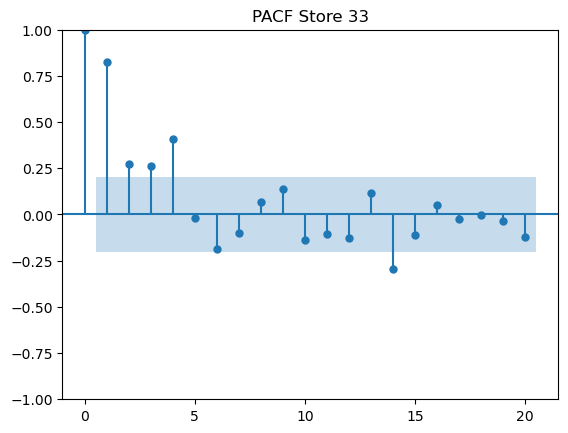

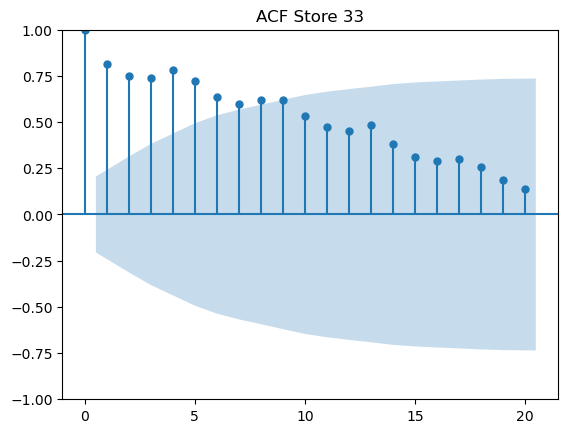

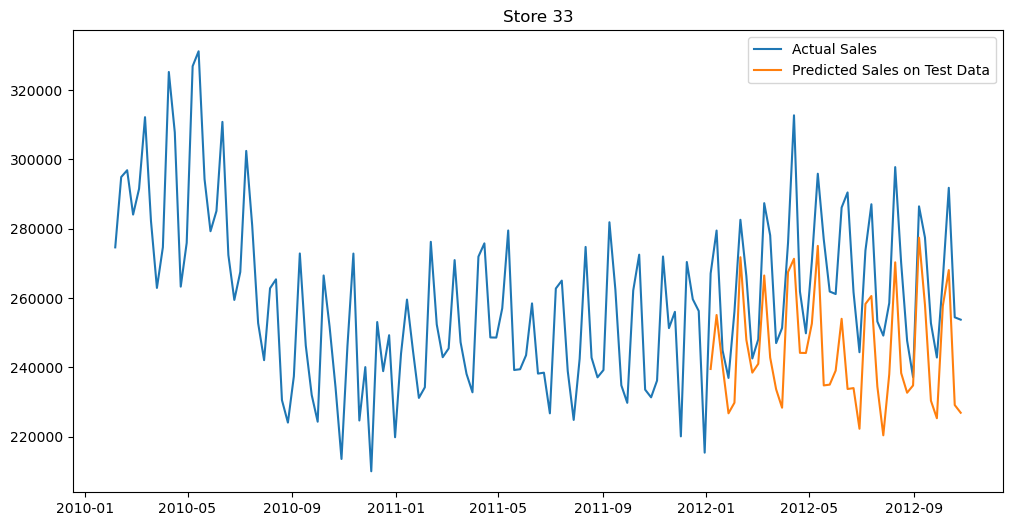

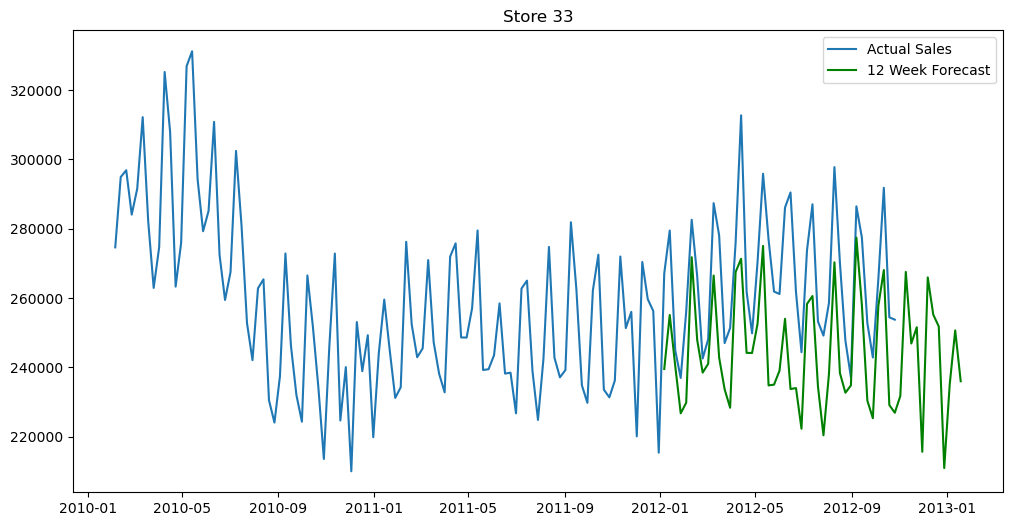

C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lokes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

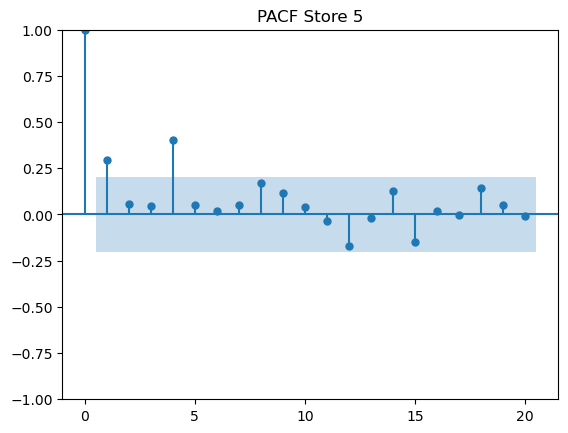

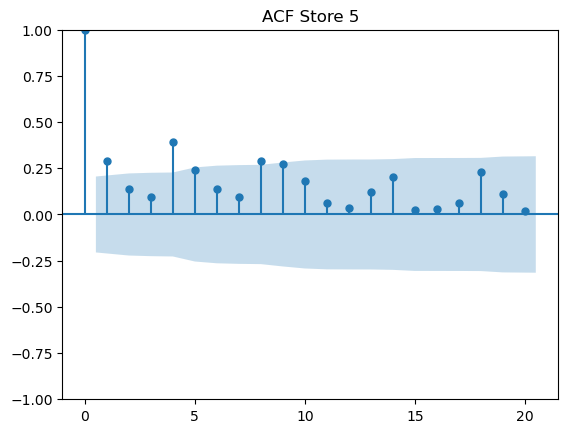

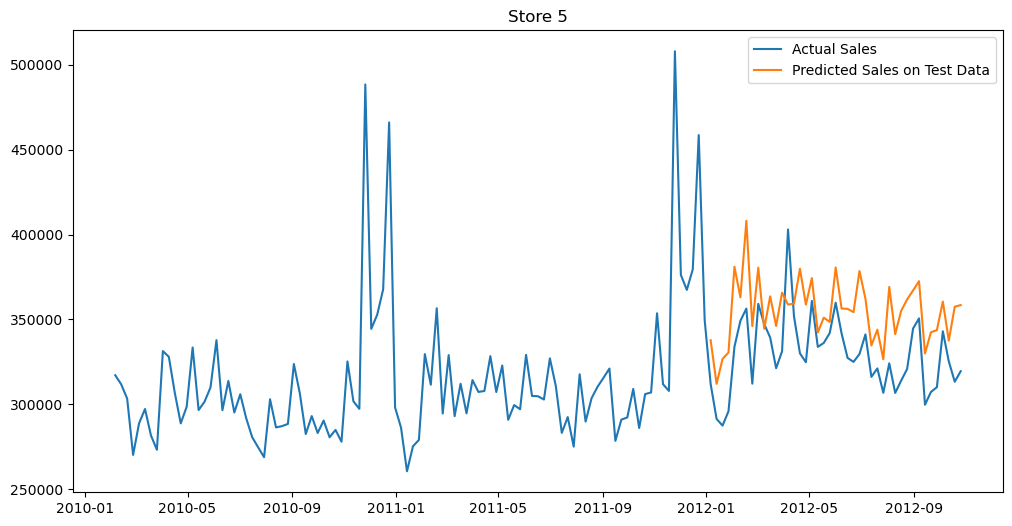

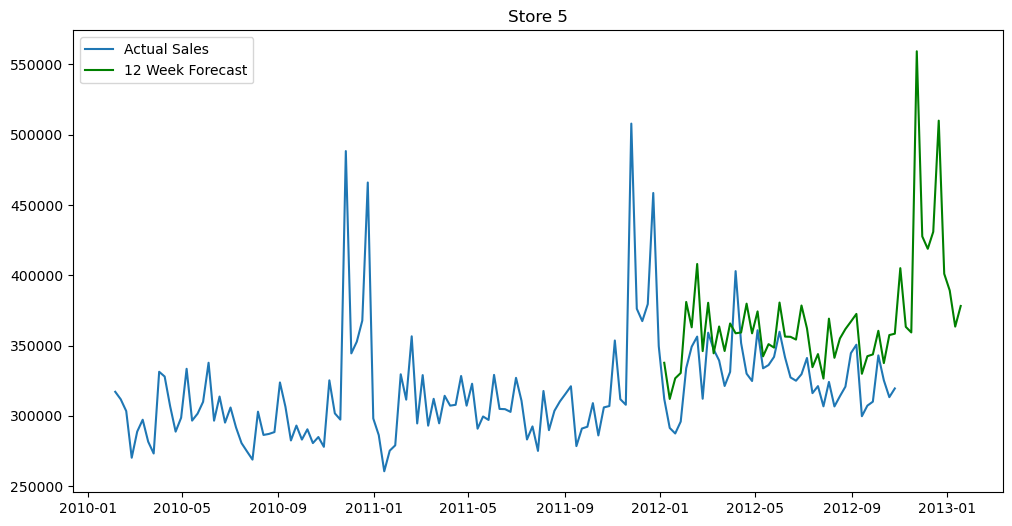

In [48]:
#model building  
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



for store_number in stationary_data_stores:
    store_data = pd.DataFrame(data1[data1['Store'] == store_number]['Weekly_Sales']).copy()
    store_data = store_data.sort_index()
   
    # Create lag features
    store_data['lag1'] = store_data['Weekly_Sales'].diff()
    store_data['lag52'] = store_data['Weekly_Sales'].diff(52)
   
    # Plot PACF and ACF for 'lag52'
    plt.figure(figsize=(12, 6))
#     ax = plt.subplot(121)
    plot_pacf(store_data['lag52'].dropna(), lags=20,title=f'PACF Store {store_number}')#ax=ax)
#     ax = plt.subplot(122)
    plot_acf(store_data['lag52'].dropna(), lags=20,title=f'ACF Store {store_number}')#ax=ax)
    # Splitting the data into train and test
    trainstore=store_data[:round(len(store_data)*.7)]
    teststore=store_data[round(len(store_data)*.7):]
    from pmdarima import auto_arima

    trainstore_data=pd.DataFrame(trainstore['Weekly_Sales'])
    teststore_data=pd.DataFrame(teststore['Weekly_Sales'])


   
    # Find p (lag for PACF)
    p = 0
    pacf_values = sm.tsa.pacf(store_data['lag52'].dropna(), nlags=20)
    for pacf_value in pacf_values:
        if abs(pacf_value) >= 0.05:
            break
        p += 1

    # Find q (lag for ACF)
    q = 0
    acf_values = sm.tsa.acf(store_data['lag52'].dropna(), nlags=20)
    for acf_value in acf_values:
        if abs(acf_value) >= 0.05:
            break
        q += 1

    # Fit SARIMA model
    model = SARIMAX(store_data['Weekly_Sales'][:round(len(store_data) * 0.7)], order=(p, 1, q), seasonal_order=(p, 1, q, 52))
    model_fit = model.fit(disp=False)
    pred=model_fit.predict(start=len(trainstore_data),end=len(trainstore_data)+len(teststore_data)-1,dynamic=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(store_data['Weekly_Sales'], label='Actual Sales')
    plt.plot(pred, label='Predicted Sales on Test Data')
    plt.title(f'Store {store_number}')
    plt.legend()
    plt.show()

    # Generate forecasts
    forecast = model_fit.forecast(steps=len(store_data) - round(len(store_data) * 0.7) + 12)

    # Plot actual sales and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(store_data['Weekly_Sales'], label='Actual Sales')
    plt.plot(forecast, label='12 Week Forecast',color='green')
    plt.title(f'Store {store_number}')
    plt.legend()
    plt.show()


 The above stores are showing upward trend in increase in sales in the coming 12 weeks.
    
 Following Recommendations will help to increase the revenue:
            
•	Increase inventory levels: To meet the increasing demand, stores should increase their inventory levels, especially for popular and high-margin items.
    
•	Expand product offerings: Stores can expand their product offerings to meet the needs of their growing customer base. This could involve adding new products, new brands, or new product categories.
    
•	Invest in marketing and promotions: Stores can invest in marketing and promotions to attract new customers and increase brand awareness.
    
•	Improve customer service: Stores can focus on improving customer service to create a positive shopping experience and keep customers coming back.
